In [83]:
import pandas as pd
import numpy as np

data = pd.read_csv('ionosphere_data.csv.csv')

In [84]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [85]:
data.shape

(351, 35)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [87]:
catg_cols = data.select_dtypes(include='object')
catg_cols

,label
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


In [88]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

for col in catg_cols:
  data.loc[:,col] = le.fit_transform(data.loc[:,col])

In [89]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [91]:
input = data.drop('label' ,1)

targets = data['label']

In [92]:
targets

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 351, dtype: int64

In [93]:
# 60 % training data 
train_data = input.iloc[:210]

train_targets = targets.iloc[:210]


# 30 % validation

validation_data = input.iloc[210 : ]
validation_targets = targets.iloc[210 : ]


In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   210 non-null    int64  
 1   feature2   210 non-null    int64  
 2   feature3   210 non-null    float64
 3   feature4   210 non-null    float64
 4   feature5   210 non-null    float64
 5   feature6   210 non-null    float64
 6   feature7   210 non-null    float64
 7   feature8   210 non-null    float64
 8   feature9   210 non-null    float64
 9   feature10  210 non-null    float64
 10  feature11  210 non-null    float64
 11  feature12  210 non-null    float64
 12  feature13  210 non-null    float64
 13  feature14  210 non-null    float64
 14  feature15  210 non-null    float64
 15  feature16  210 non-null    float64
 16  feature17  210 non-null    float64
 17  feature18  210 non-null    float64
 18  feature19  210 non-null    float64
 19  feature20  210 non-null    float64
 20  feature21 

In [95]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 210 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   141 non-null    int64  
 1   feature2   141 non-null    int64  
 2   feature3   141 non-null    float64
 3   feature4   141 non-null    float64
 4   feature5   141 non-null    float64
 5   feature6   141 non-null    float64
 6   feature7   141 non-null    float64
 7   feature8   141 non-null    float64
 8   feature9   141 non-null    float64
 9   feature10  141 non-null    float64
 10  feature11  141 non-null    float64
 11  feature12  141 non-null    float64
 12  feature13  141 non-null    float64
 13  feature14  141 non-null    float64
 14  feature15  141 non-null    float64
 15  feature16  141 non-null    float64
 16  feature17  141 non-null    float64
 17  feature18  141 non-null    float64
 18  feature19  141 non-null    float64
 19  feature20  141 non-null    float64
 20  feature2

In [103]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(34,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [105]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [106]:
history = model.fit(train_data,
train_targets,
epochs=100,
batch_size=32,
validation_data=(validation_data, validation_targets))

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 0.6945 - accuracy: 0.5173 - val_loss: 0.6667 - val_accuracy: 0.7660
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6353 - val_loss: 0.6455 - val_accuracy: 0.8582
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6537 - accuracy: 0.6787 - val_loss: 0.6246 - val_accuracy: 0.9007
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6216 - accuracy: 0.7595 - val_loss: 0.6085 - val_accuracy: 0.9220
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6104 - accuracy: 0.7506 - val_loss: 0.5934 - val_accuracy: 0.9291
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5879 - accuracy: 0.7863 - val_loss: 0.5790 - val_accuracy: 0.9291
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5895 - accuracy: 0.7578 - val_loss: 0.5635 - val_accuracy: 0.9362
Epoch 8/100
7/7 [=======

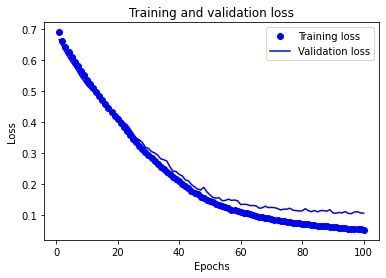

In [108]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 101)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()